<a href="https://colab.research.google.com/github/alvafox/Doctorado-Nacional-2023-Analisis-de-Adjudicacion-Paritaria-/blob/main/Doctorado_Nacional_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis estadístico-descriptivo de la adjudicación paritaria para Doctorado Nacional 2023**
---

In [1]:
!pip install sidetable
!pip install pandas==1.2.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#!pip install matplotlib --upgrade
!pip install matplotlib==3.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import sidetable as stb
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
pd.set_option('precision', 3)
pd.set_option('max_rows', 100)

In [6]:
df = pd.read_csv("/content/drive/MyDrive/CONCURSO PUNTAJE FINAL (REDONDEO).csv", encoding='latin-1', sep=";", decimal=",", dtype={'ESTADO_FINAL' : 'category'})
df

,FOLIO,COMITÉ,Nombre,Género,Área OCDE,ESTADO ADMISIBILIDAD,NOTA PREGRADO,TIPO RANKING,RANKING,TOTAL,...,Ptje.Comite,Antecedentes Académicos,Bonificación-Etnia,Bonificación-Región,Bonificación-Discapacidad,Bonificaciones-Reparación,Bonificación Final,PUNTAJE_FINAL,ESTADO_FINAL,Rank
0,21230002,Cs. de la Ingeniería I,Hernan Hernandez Manzano,Masculino,INGENIERIA Y TECNOLOGIA,ADMISIBLE,5.77,NO RANKING,0,0,...,3.756,3.934,0.0,0.000,0.0,0.0,0.000,3.756,NO SELECCIONADA,1819
1,21230003,Derecho,Cinthia Lorena Jaramillo Lucas,Femenino,CIENCIAS SOCIALES,FUERA DE BASES,0.00,NO PRESENTA,0,0,...,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000,FUERA DE BASES,2144
2,21230004,Psicología,Amanda de la Caridad Lorenzo Carreiro,Femenino,CIENCIAS SOCIALES,FUERA DE BASES,0.00,NO RANKING,0,0,...,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000,FUERA DE BASES,2145
3,21230005,Administración,Alejandro Carrillo Vitale,Masculino,CIENCIAS SOCIALES,FUERA DE BASES,0.00,NO RANKING,0,0,...,0.000,0.000,0.0,0.125,0.0,0.0,0.125,0.000,FUERA DE BASES,2146
4,21230006,Ecología y Ciencias Naturales,Eduardo Alejandro Avila Acevedo,Masculino,CIENCIAS NATURALES,ADMISIBLE,5.00,EGRESO,1,1,...,3.763,4.000,0.0,0.125,0.0,0.0,0.125,3.888,NO SELECCIONADA,1658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,21232437,Ecología y Ciencias Naturales,Valentina Patricia Silva Pedreros,Femenino,CIENCIAS NATURALES,FUERA DE BASES,6.09,SIN PROMOCIÓN,18,81,...,0.000,4.059,0.0,0.125,0.0,0.0,0.125,0.000,FUERA DE BASES,2438
2436,21232438,Derecho,Ernesto Muñoz Lamartine,Masculino,CIENCIAS SOCIALES,FUERA DE BASES,5.03,EGRESO,89,268,...,0.000,0.000,0.0,0.125,0.0,0.0,0.125,0.000,FUERA DE BASES,2439
2437,21232439,Agronomía y Forestal,Julio Cesar Cornejo Muñoz,Masculino,CIENCIAS AGRICOLAS,FUERA DE BASES,0.00,NO RANKING,0,0,...,0.000,0.000,0.0,0.125,0.0,0.0,0.125,0.000,FUERA DE BASES,2440
2438,21232440,Cs. Veterinarias,Maria Carolina Smok Soto,Femenino,CIENCIAS AGRICOLAS,ADMISIBLE,6.20,EGRESO,72,98,...,3.774,2.747,0.0,0.125,0.0,0.0,0.125,3.899,NO SELECCIONADA,1646


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2440 entries, 0 to 2439
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   FOLIO                      2440 non-null   int64   
 1   COMITÉ                     2440 non-null   object  
 2   Nombre                     2440 non-null   object  
 3   Género                     2440 non-null   object  
 4   Área OCDE                  2440 non-null   object  
 5   ESTADO ADMISIBILIDAD       2440 non-null   object  
 6   NOTA PREGRADO              2440 non-null   float64 
 7   TIPO RANKING               2440 non-null   object  
 8   RANKING                    2440 non-null   int64   
 9   TOTAL                      2440 non-null   int64   
 10  % RANKING                  2440 non-null   float64 
 11  Y                          2440 non-null   float64 
 12  P                          2440 non-null   float64 
 13  PQ                         2440 n

In [8]:
df.stb.freq(["Género"])

,Género,count,percent,cumulative_count,cumulative_percent
0,Masculino,1429,58.566,1429,58.566
1,Femenino,1011,41.434,2440,100.000


In [9]:
df2 = df[df["ESTADO ADMISIBILIDAD"] == "ADMISIBLE"]
df2[["AAP","SUBCRITERIO 2.1", "SUBCRITERIO 2.2","SUBCRITERIO 3.1", "SUBCRITERIO 3.2", "SUBCRITERIO 3.3"]].describe().T

,count,mean,std,min,25%,50%,75%,max
AAP,2143.0,3.885,0.628,1.662,3.446,3.952,4.373,5.0
SUBCRITERIO 2.1,2143.0,4.186,0.668,0.000,3.750,4.250,4.750,5.0
SUBCRITERIO 2.2,2143.0,4.415,0.579,0.000,4.250,4.500,4.750,5.0
SUBCRITERIO 3.1,2143.0,4.060,0.723,1.000,3.750,4.250,4.500,5.0
SUBCRITERIO 3.2,2143.0,4.289,0.649,1.000,4.000,4.500,4.750,5.0
SUBCRITERIO 3.3,2143.0,4.158,0.709,0.000,3.750,4.250,4.750,5.0


In [10]:
df2.groupby('Género')["AAP","SUBCRITERIO 2.1", "SUBCRITERIO 2.2","SUBCRITERIO 3.1", "SUBCRITERIO 3.2", "SUBCRITERIO 3.3"].describe().T

<ipython-input-10-a570201a39c0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2.groupby('Género')["AAP","SUBCRITERIO 2.1", "SUBCRITERIO 2.2","SUBCRITERIO 3.1", "SUBCRITERIO 3.2", "SUBCRITERIO 3.3"].describe().T


Género                 Femenino  Masculino
AAP             count   908.000   1235.000
                mean      3.897      3.875
                std       0.606      0.643
                min       1.722      1.662
                25%       3.506      3.411
                50%       3.966      3.945
                75%       4.375      4.369
                max       5.000      5.000
SUBCRITERIO 2.1 count   908.000   1235.000
                mean      4.170      4.199
                std       0.708      0.638
                min       0.000      1.750
                25%       3.750      3.750
                50%       4.250      4.250
                75%       4.750      4.750
                max       5.000      5.000
SUBCRITERIO 2.2 count   908.000   1235.000
                mean      4.409      4.420
                std       0.620      0.547
                min       0.000      2.000
                25%       4.250      4.000
                50%       4.500      4.500
                75%       4.750      4.750
                max       5.000      5.000
SUBCRITERIO 3.1 count   908.000   1235.000
                mean      4.059      4.061
                std       0.733      0.716
                min       1.000      1.000
                25%       3.750      3.750
                50%       4.250      4.250
                75%       4.500      4.500
                max       5.000      5.000
SUBCRITERIO 3.2 count   908.000   1235.000
                mean      4.301      4.280
                std       0.653      0.645
                min       1.000      1.000
                25%       4.000      4.000
                50%       4.500      4.500
                75%       4.750      4.750
                max       5.000      5.000
SUBCRITERIO 3.3 count   908.000   1235.000
                mean      4.172      4.147
                std       0.712      0.707
                min       0.000      1.000
                25%       3.750      3.750
                50%       4.250      4.250
                75%       4.750      4.750
                max       5.000      5.000

In [11]:
(
df[df["ESTADO ADMISIBILIDAD"] == "ADMISIBLE"]
 .groupby(["COMITÉ"])
 .agg({'FOLIO':'count', 
       "AAP":'median', 
       "SUBCRITERIO 2.1":'median', 
       "SUBCRITERIO 2.2":'median', 
       "SUBCRITERIO 3.1":'median', 
       "SUBCRITERIO 3.2":'median', 
       "SUBCRITERIO 3.3":'median'})
 .round(3)
 #.apply(lambda x: round(x, 3) if x.name not in df.select_dtypes('integer').columns else x)
 .style.background_gradient(axis=None, cmap='YlOrRd', subset= ["AAP","SUBCRITERIO 2.1", "SUBCRITERIO 2.2","SUBCRITERIO 3.1", "SUBCRITERIO 3.2", "SUBCRITERIO 3.3"])
)

,FOLIO,AAP,SUBCRITERIO 2.1,SUBCRITERIO 2.2,SUBCRITERIO 3.1,SUBCRITERIO 3.2,SUBCRITERIO 3.3
COMITÉ,,,,,,,
Administración,28,3.458,4.125,4.375,4.000,4.250,4.250
Agronomía y Forestal,84,3.708,4.250,4.500,4.250,4.500,4.375
Arquitectura,17,3.805,4.250,4.500,4.000,4.500,3.500
Arte,26,4.262,4.500,4.750,4.500,4.750,4.500
Biología Celular y Molecular,135,3.794,4.500,4.500,4.500,4.500,4.500
Biología Fisiológica y Bioquímica,91,3.860,4.500,4.750,4.500,4.500,4.500
Biotecnología,147,3.860,4.250,4.500,4.250,4.500,4.250
Computación e Informática,61,4.176,4.500,4.500,4.250,4.500,4.500
Comunicación,32,3.966,4.250,4.500,4.125,4.500,4.250


In [12]:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
(
df[df["ESTADO ADMISIBILIDAD"] == "ADMISIBLE"]
  .groupby(["COMITÉ", "Género"])
   .agg({'FOLIO':'count', 
         "AAP":'median', 
         "SUBCRITERIO 2.1":'median', 
         "SUBCRITERIO 2.2":'median', 
         "SUBCRITERIO 3.1":'median', 
         "SUBCRITERIO 3.2":'median', 
         "SUBCRITERIO 3.3":'median'})
   .round(3)
# .apply(lambda x: round(x, 3) if x.name not in df.select_dtypes('integer').columns else x)
  .style.background_gradient(axis=None, cmap='YlOrRd', subset= ["AAP","SUBCRITERIO 2.1", "SUBCRITERIO 2.2","SUBCRITERIO 3.1", "SUBCRITERIO 3.2", "SUBCRITERIO 3.3"])
)

In [13]:
df[df["ESTADO ADMISIBILIDAD"] == "ADMISIBLE"]["PUNTAJE_FINAL"].describe().T.to_frame()

,PUNTAJE_FINAL
count,2143.000
mean,4.179
std,0.438
min,2.285
25%,3.923
50%,4.244
75%,4.493
max,5.073


In [14]:
import numpy as np

bins = np.arange(0, 5.6, 0.2)
bins = bins.round(3).tolist()

bins

[0.0,
 0.2,
 0.4,
 0.6,
 0.8,
 1.0,
 1.2,
 1.4,
 1.6,
 1.8,
 2.0,
 2.2,
 2.4,
 2.6,
 2.8,
 3.0,
 3.2,
 3.4,
 3.6,
 3.8,
 4.0,
 4.2,
 4.4,
 4.6,
 4.8,
 5.0,
 5.2,
 5.4]

In [15]:
#bins = [0.000, 0.250, 0.500, 0.750, 1.000, 1.250, 1.500, 1.750, 2.000, 2.250, 2.500, 2.750, 3.000, 3.250, 3.500, 3.750, 4.000, 4.250, 4.500, 4.750, 5.000, 5.250, 5.500]

display(df2.groupby(["Género", pd.cut(df2.PUNTAJE_FINAL, bins, right=False, include_lowest=True)])["FOLIO"].count().unstack(0).style.background_gradient())

Género,Femenino,Masculino
PUNTAJE_FINAL,,
"[0.0, 0.2)",0,0
"[0.2, 0.4)",0,0
"[0.4, 0.6)",0,0
"[0.6, 0.8)",0,0
"[0.8, 1.0)",0,0
"[1.0, 1.2)",0,0
"[1.2, 1.4)",0,0
"[1.4, 1.6)",0,0
"[1.6, 1.8)",0,0


In [16]:
prueba = df2.groupby(["Género", pd.cut(df2.PUNTAJE_FINAL, bins, right=False, include_lowest=True)])["FOLIO"].count().unstack(0)
prueba['Total'] = prueba['Masculino'] + prueba['Femenino'] 
prueba

Género,Femenino,Masculino,Total
PUNTAJE_FINAL,,,
"[0.0, 0.2)",0,0,0
"[0.2, 0.4)",0,0,0
"[0.4, 0.6)",0,0,0
"[0.6, 0.8)",0,0,0
"[0.8, 1.0)",0,0,0
"[1.0, 1.2)",0,0,0
"[1.2, 1.4)",0,0,0
"[1.4, 1.6)",0,0,0
"[1.6, 1.8)",0,0,0


[Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '22'),
 Text(0, 0, '23'),
 Text(0, 0, '50'),
 Text(0, 0, '102'),
 Text(0, 0, '166'),
 Text(0, 0, '260'),
 Text(0, 0, '341'),
 Text(0, 0, '403'),
 Text(0, 0, '427'),
 Text(0, 0, '251'),
 Text(0, 0, '65'),
 Text(0, 0, '15'),
 Text(0, 0, '0')]

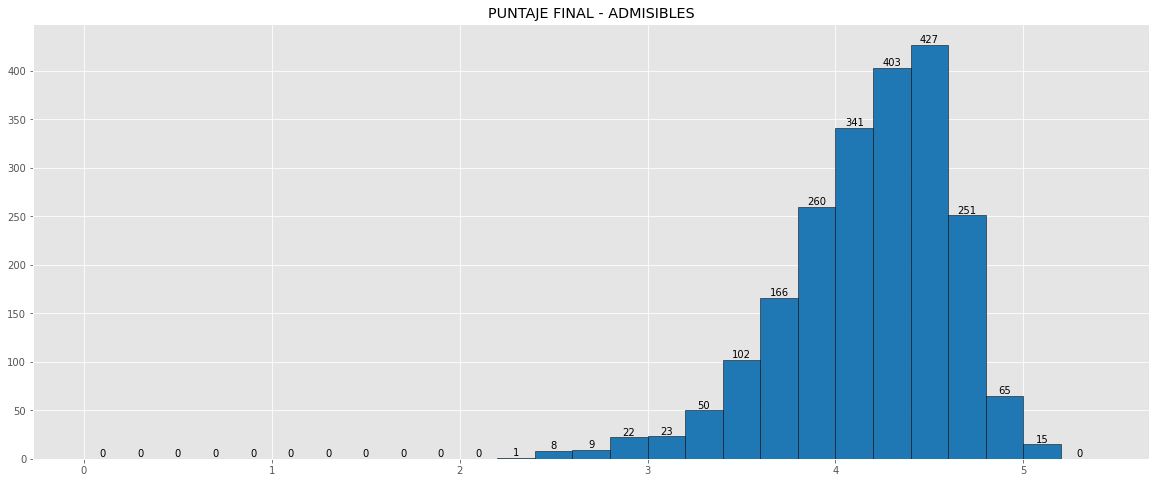

In [17]:
plt.style.use('ggplot')

#bins = [0.000, 0.250, 0.500, 0.750, 1.000, 1.250, 1.500, 1.750, 2.000, 2.250, 2.500, 2.750, 3.000, 3.250, 3.500, 3.750, 4.000, 4.250, 4.500, 4.750, 5.000, 5.250, 5.500]

plt.figure(figsize=(20, 8))
counts, edges, bars = plt.hist(df2[["PUNTAJE_FINAL"]], bins=bins, edgecolor='k', facecolor='#1f77b4')

plt.title("PUNTAJE FINAL - ADMISIBLES")
plt.bar_label(bars)

[Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '6'),
 Text(0, 0, '4'),
 Text(0, 0, '11'),
 Text(0, 0, '9'),
 Text(0, 0, '19'),
 Text(0, 0, '37'),
 Text(0, 0, '66'),
 Text(0, 0, '109'),
 Text(0, 0, '144'),
 Text(0, 0, '180'),
 Text(0, 0, '192'),
 Text(0, 0, '101'),
 Text(0, 0, '22'),
 Text(0, 0, '7'),
 Text(0, 0, '0')]

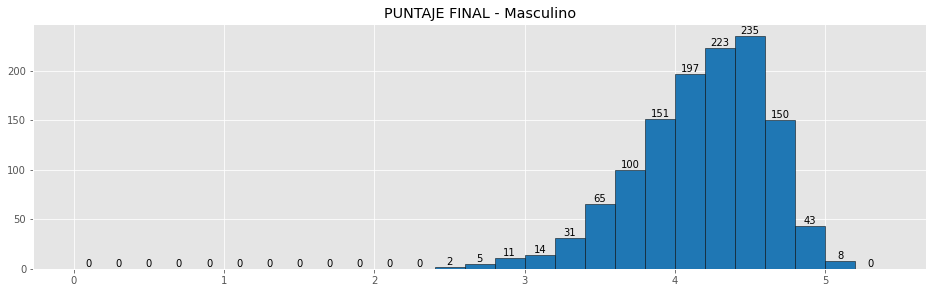

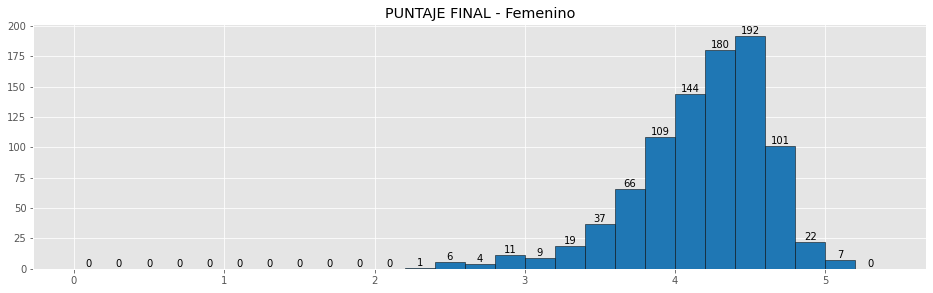

In [18]:
plt.style.use('ggplot')

#bins = [0.000, 0.250, 0.500, 0.750, 1.000, 1.250, 1.500, 1.750, 2.000, 2.250, 2.500, 2.750, 3.000, 3.250, 3.500, 3.750, 4.000, 4.250, 4.500, 4.750, 5.000, 5.250, 5.500]

plt.figure(figsize=(16, 4.5))
counts, edges, bars = plt.hist(df2[df2["Género"] == "Masculino"][["PUNTAJE_FINAL"]], bins=bins, edgecolor='k', facecolor='#1f77b4')

plt.title("PUNTAJE FINAL - Masculino")
plt.bar_label(bars)


plt.figure(figsize=(16, 4.5))
counts, edges, bars = plt.hist(df2[df2["Género"] == "Femenino"][["PUNTAJE_FINAL"]], bins=bins, edgecolor='k', facecolor='#1f77b4')

plt.title("PUNTAJE FINAL - Femenino")
plt.bar_label(bars)

# SELECCIONADOS

In [19]:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
(
df[df["ESTADO_FINAL"] == "SELECCIONADA"].groupby(["COMITÉ", "Género"])
  .agg({'FOLIO':'count', 
        "AAP":'median', 
        "SUBCRITERIO 2.1":'median', 
        "SUBCRITERIO 2.2":'median', 
        "SUBCRITERIO 3.1":'median', 
        "SUBCRITERIO 3.2":'median', 
        "SUBCRITERIO 3.3":'median'})
  .round(3)
#  .apply(lambda x: round(x, 3) if x.name not in df.select_dtypes('integer').columns else x)
  .style.background_gradient(axis=None, cmap='YlOrRd', subset= ["AAP","SUBCRITERIO 2.1", "SUBCRITERIO 2.2","SUBCRITERIO 3.1", "SUBCRITERIO 3.2", "SUBCRITERIO 3.3"])
)

[Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '128'),
 Text(0, 0, '192'),
 Text(0, 0, '101'),
 Text(0, 0, '22'),
 Text(0, 0, '7'),
 Text(0, 0, '0')]

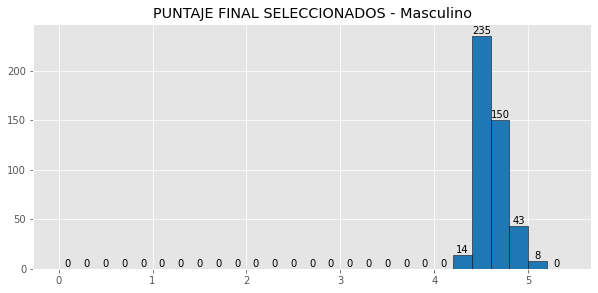

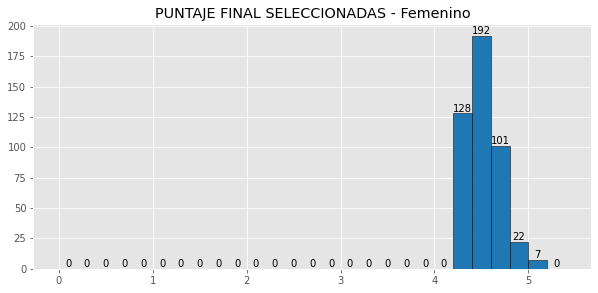

In [20]:
plt.style.use('ggplot')

#bins = [0.000, 0.250, 0.500, 0.750, 1.000, 1.250, 1.500, 1.750, 2.000, 2.250, 2.500, 2.750, 3.000, 3.250, 3.500, 3.750, 4.000, 4.250, 4.500, 4.750, 5.000, 5.250, 5.500]

plt.figure(figsize=(10, 4.5))
counts, edges, bars = plt.hist(df2[(df2["Género"] == "Masculino") & (df2["ESTADO_FINAL"] == "SELECCIONADA")][["PUNTAJE_FINAL"]], bins=bins, edgecolor='k', facecolor='#1f77b4')

plt.title("PUNTAJE FINAL SELECCIONADOS - Masculino")
plt.bar_label(bars)

plt.figure(figsize=(10, 4.5))
counts, edges, bars = plt.hist(df2[(df2["Género"] == "Femenino") & (df2["ESTADO_FINAL"] == "SELECCIONADA")][["PUNTAJE_FINAL"]], bins=bins, edgecolor='k', facecolor='#1f77b4')

plt.title("PUNTAJE FINAL SELECCIONADAS - Femenino")
plt.bar_label(bars)

In [21]:
#bins = [0.000, 0.250, 0.500, 0.750, 1.000, 1.250, 1.500, 1.750, 2.000, 2.250, 2.500, 2.750, 3.000, 3.250, 3.500, 3.750, 4.000, 4.250, 4.500, 4.750, 5.000, 5.250, 5.500]

display(df2[(df2["ESTADO_FINAL"] == "SELECCIONADA")].groupby(["Género", pd.cut(df2[(df2["ESTADO_FINAL"] == "SELECCIONADA")].PUNTAJE_FINAL, bins, right=False, include_lowest=True)])["FOLIO"].count().unstack(0).style.background_gradient())

Género,Femenino,Masculino
PUNTAJE_FINAL,,
"[0.0, 0.2)",0,0
"[0.2, 0.4)",0,0
"[0.4, 0.6)",0,0
"[0.6, 0.8)",0,0
"[0.8, 1.0)",0,0
"[1.0, 1.2)",0,0
"[1.2, 1.4)",0,0
"[1.4, 1.6)",0,0
"[1.6, 1.8)",0,0


# Gráfico seleccionadas por comité

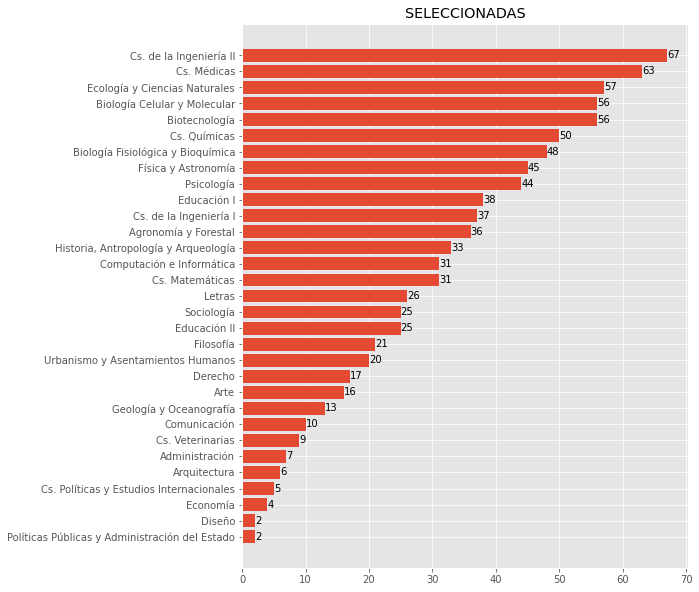

In [22]:
graph = df[df['ESTADO_FINAL'] == 'SELECCIONADA'].groupby(['COMITÉ'])['FOLIO'].count().sort_values()

plt.figure(figsize=(8, 10))
plt.barh(graph.index, graph.values)


plt.title("SELECCIONADAS")
for i, v in enumerate(graph.values):
    plt.text(v, i, str(v), ha='left', va='center')

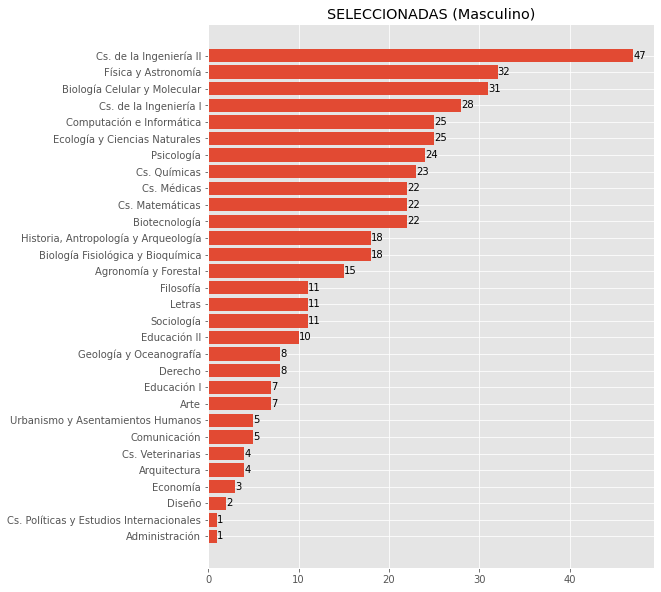

In [23]:
graph = df[(df['ESTADO_FINAL'] == 'SELECCIONADA') & (df['Género'] == 'Masculino')].groupby(['COMITÉ'])['FOLIO'].count().sort_values()

plt.figure(figsize=(8, 10))
plt.barh(graph.index, graph.values)

plt.title("SELECCIONADAS (Masculino)")
for i, v in enumerate(graph.values):
    plt.text(v, i, str(v), ha='left', va='center')

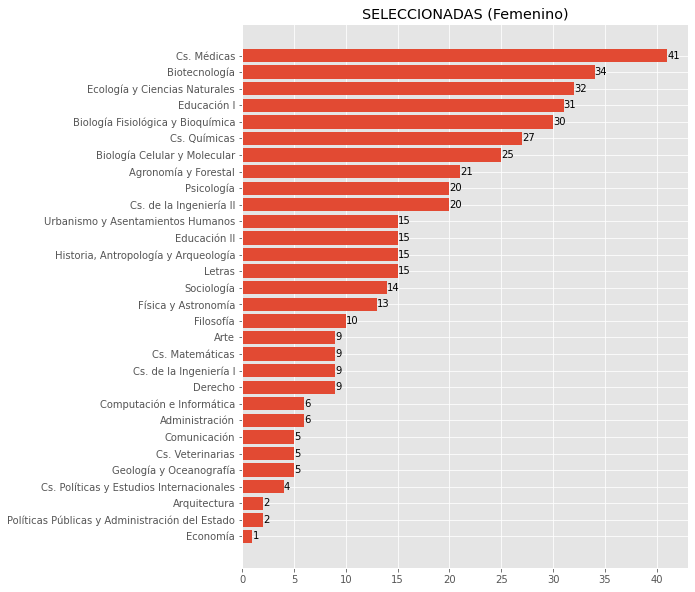

In [24]:
graph = df[(df['ESTADO_FINAL'] == 'SELECCIONADA') & (df['Género'] == 'Femenino')].groupby(['COMITÉ'])['FOLIO'].count().sort_values()

plt.figure(figsize=(8, 10))
plt.barh(graph.index, graph.values)

plt.title("SELECCIONADAS (Femenino)")
for i, v in enumerate(graph.values):
    plt.text(v, i, str(v), ha='left', va='center')

In [25]:
df[df['ESTADO_FINAL'] == 'SELECCIONADA'].groupby(['COMITÉ', 'Género'])['FOLIO'].count().sort_values().unstack(1).fillna(0).astype('int').style.background_gradient(cmap= 'YlOrRd')

Género,Femenino,Masculino
COMITÉ,,
Administración,6,1
Agronomía y Forestal,21,15
Arquitectura,2,4
Arte,9,7
Biología Celular y Molecular,25,31
Biología Fisiológica y Bioquímica,30,18
Biotecnología,34,22
Computación e Informática,6,25
Comunicación,5,5


In [26]:
#df[df['ESTADO_FINAL'] == 'SELECCIONADA'].groupby(['COMITÉ', 'Género'])['FOLIO'].count().sort_values().unstack(1).fillna(0).astype('int').style.background_gradient(cmap= 'YlOrRd')
#df[df['ESTADO_FINAL'] == 'SELECCIONADA'].groupby(['COMITÉ'])['Género'].value_counts("%").sort_values().unstack(1).fillna(0).style.background_gradient(cmap= 'YlOrRd')

brecha = df[df['ESTADO_FINAL'] == 'SELECCIONADA'].groupby(['COMITÉ'])['Género'].value_counts("%").sort_values().unstack(1).fillna(0)

brecha['Brecha'] =  brecha['Masculino'] - brecha['Femenino']

brecha = brecha*100

brecha.style.background_gradient(cmap= 'YlOrRd', subset=['Brecha']).format("{:.2f}%")

Género,Femenino,Masculino,Brecha
COMITÉ,,,
Administración,85.71%,14.29%,-71.43%
Agronomía y Forestal,58.33%,41.67%,-16.67%
Arquitectura,33.33%,66.67%,33.33%
Arte,56.25%,43.75%,-12.50%
Biología Celular y Molecular,44.64%,55.36%,10.71%
Biología Fisiológica y Bioquímica,62.50%,37.50%,-25.00%
Biotecnología,60.71%,39.29%,-21.43%
Computación e Informática,19.35%,80.65%,61.29%
Comunicación,50.00%,50.00%,0.00%


Al observar las brechas de género, es posible notar que los siguientes comités cuentan con una adjudicación en donde el género masculino está "sobrerepresentado":

- Arquitectura (33.33%)
- Computación e Informática	(61.29%)
- Cs. Matemáticas	(41.94%)
- Cs. de la Ingeniería I (51.35%)
- Cs. de la Ingeniería II	(40.30%)
- Diseño	(100.00%)
- Economía	(50.00%)
- Física y Astronomía	(42.22%)


Se tomaron arbitrariamente las brechas sobre el 30%. Notar que en algunos casos el resultado debe ser interpretado con cautela debido al bajo número de postulaciones presentes en cada comité (Diseño y Economía, entre otros).

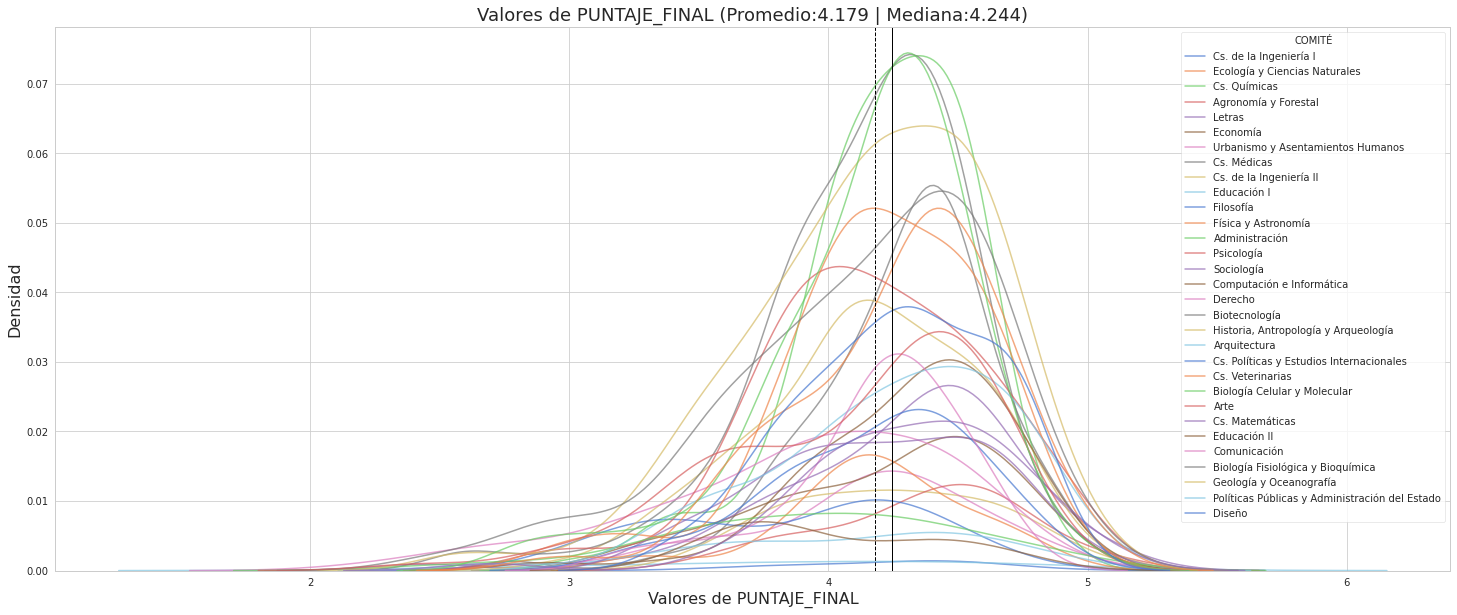

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la gráfica de densidad utilizando seaborn
plt.figure(figsize=(25, 10))
sns.set_style("whitegrid")
ax = sns.kdeplot(data=df2, x="PUNTAJE_FINAL", hue="COMITÉ", fill=False, alpha=0.7, palette="muted")

# Agregar la línea del promedio y la mediana
promedio = df2['PUNTAJE_FINAL'].mean()
mediana = df2['PUNTAJE_FINAL'].median()

ax.axvline(promedio, color='black', linestyle='dashed', linewidth=1)
ax.axvline(mediana, color='black', linestyle='solid', linewidth=1)

# Agregar etiquetas y título
ax.set_xlabel('Valores de PUNTAJE_FINAL', fontsize=16)
ax.set_ylabel('Densidad', fontsize=16)
plt.title(str('Valores de PUNTAJE_FINAL (Promedio:'+ str(promedio.round(3)) + ' | ' + 'Mediana:' + str(mediana.round(3)) + ')'), fontsize=18)

# Mostrar la gráfica
plt.show()

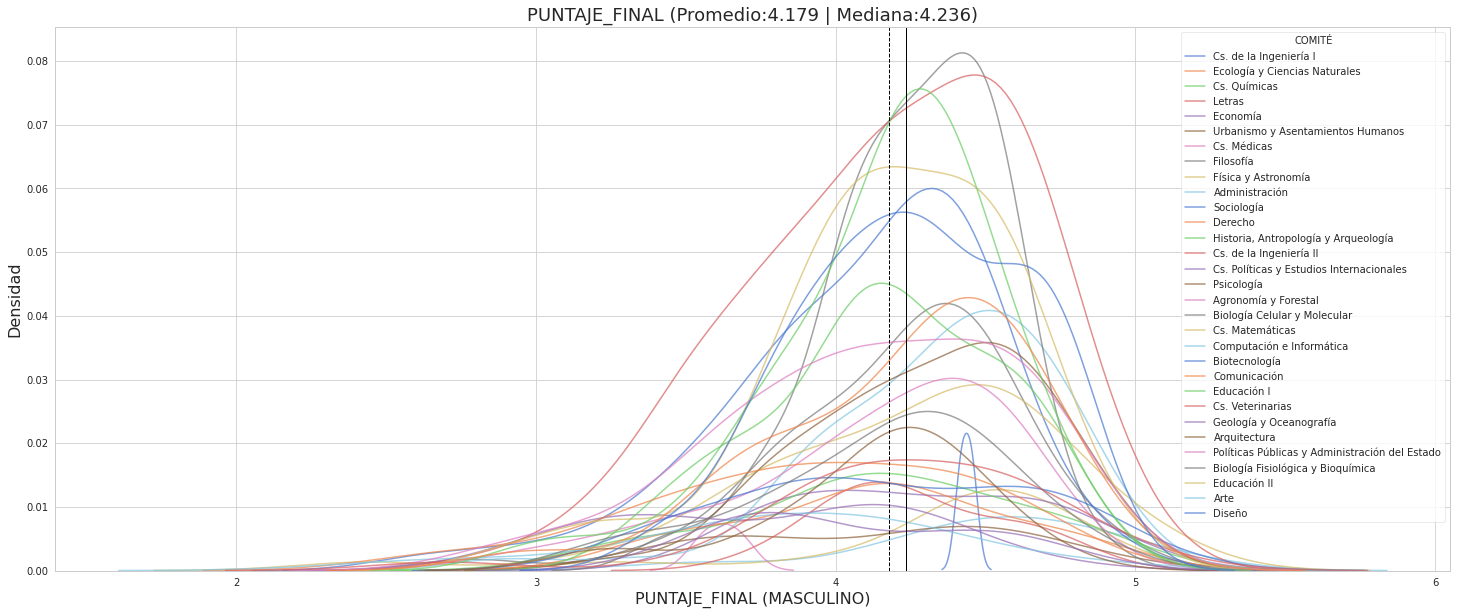

In [28]:
# Crear la gráfica de densidad utilizando seaborn
plt.figure(figsize=(25, 10))
sns.set_style("whitegrid")
ax = sns.kdeplot(data=df2[df2['Género'] == 'Masculino'], x="PUNTAJE_FINAL", hue="COMITÉ", fill=False, alpha=0.7, palette="muted")

# Agregar la línea del promedio y la mediana
promedio = df2[df2['Género'] == 'Masculino']['PUNTAJE_FINAL'].mean()
mediana = df2[df2['Género'] == 'Masculino']['PUNTAJE_FINAL'].median()

ax.axvline(promedio, color='black', linestyle='dashed', linewidth=1)
ax.axvline(mediana, color='black', linestyle='solid', linewidth=1)

# Agregar etiquetas y título
ax.set_xlabel('PUNTAJE_FINAL (MASCULINO)', fontsize=16)
ax.set_ylabel('Densidad', fontsize=16)
plt.title(str('PUNTAJE_FINAL (Promedio:'+ str(promedio.round(3)) + ' | ' + 'Mediana:' + str(mediana.round(3)) + ')'), fontsize=18)

# Mostrar la gráfica
plt.show()

<ipython-input-29-fea238ccb464>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  ax = sns.kdeplot(data=df2[df2['Género'] == 'Femenino'], x="PUNTAJE_FINAL", hue="COMITÉ", fill=False, alpha=0.7, palette="muted")


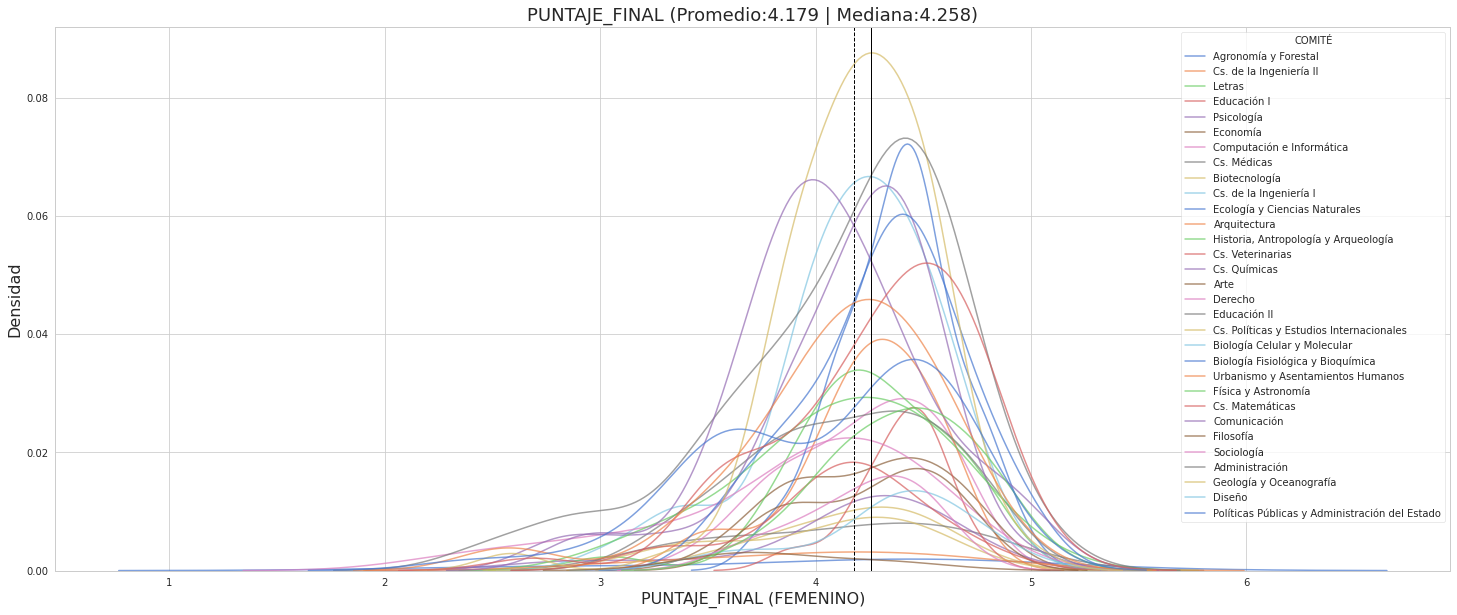

In [29]:
# Crear la gráfica de densidad utilizando seaborn
plt.figure(figsize=(25, 10))
sns.set_style("whitegrid")
ax = sns.kdeplot(data=df2[df2['Género'] == 'Femenino'], x="PUNTAJE_FINAL", hue="COMITÉ", fill=False, alpha=0.7, palette="muted")

# Agregar la línea del promedio y la mediana
promedio = df2[df2['Género'] == 'Femenino']['PUNTAJE_FINAL'].mean()
mediana = df2[df2['Género'] == 'Femenino']['PUNTAJE_FINAL'].median()

ax.axvline(promedio, color='black', linestyle='dashed', linewidth=1)
ax.axvline(mediana, color='black', linestyle='solid', linewidth=1)

# Agregar etiquetas y título
ax.set_xlabel('PUNTAJE_FINAL (FEMENINO)', fontsize=16)
ax.set_ylabel('Densidad', fontsize=16)
plt.title(str('PUNTAJE_FINAL (Promedio:'+ str(promedio.round(3)) + ' | ' + 'Mediana:' + str(mediana.round(3)) + ')'), fontsize=18)

# Mostrar la gráfica
plt.show()

In [30]:
display(df2['PUNTAJE_FINAL'].mean())
display(df2['PUNTAJE_FINAL'].median())
display(df2[df2['Género'] == 'Femenino']['PUNTAJE_FINAL'].mean())
display(df2[df2['Género'] == 'Masculino']['PUNTAJE_FINAL'].mean())
display(df2[df2['Género'] == 'Femenino']['PUNTAJE_FINAL'].median())
display(df2[df2['Género'] == 'Masculino']['PUNTAJE_FINAL'].median())

4.178940737284181

4.244

4.178940528634361

4.178940890688259

4.2575

4.236

In [31]:
!pip install joypy  #install the package
import joypy
#https://leotac.github.io/posts/2017/08/01/joypy/
plt.style.use('ggplot')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Figure size 800x480 with 0 Axes>

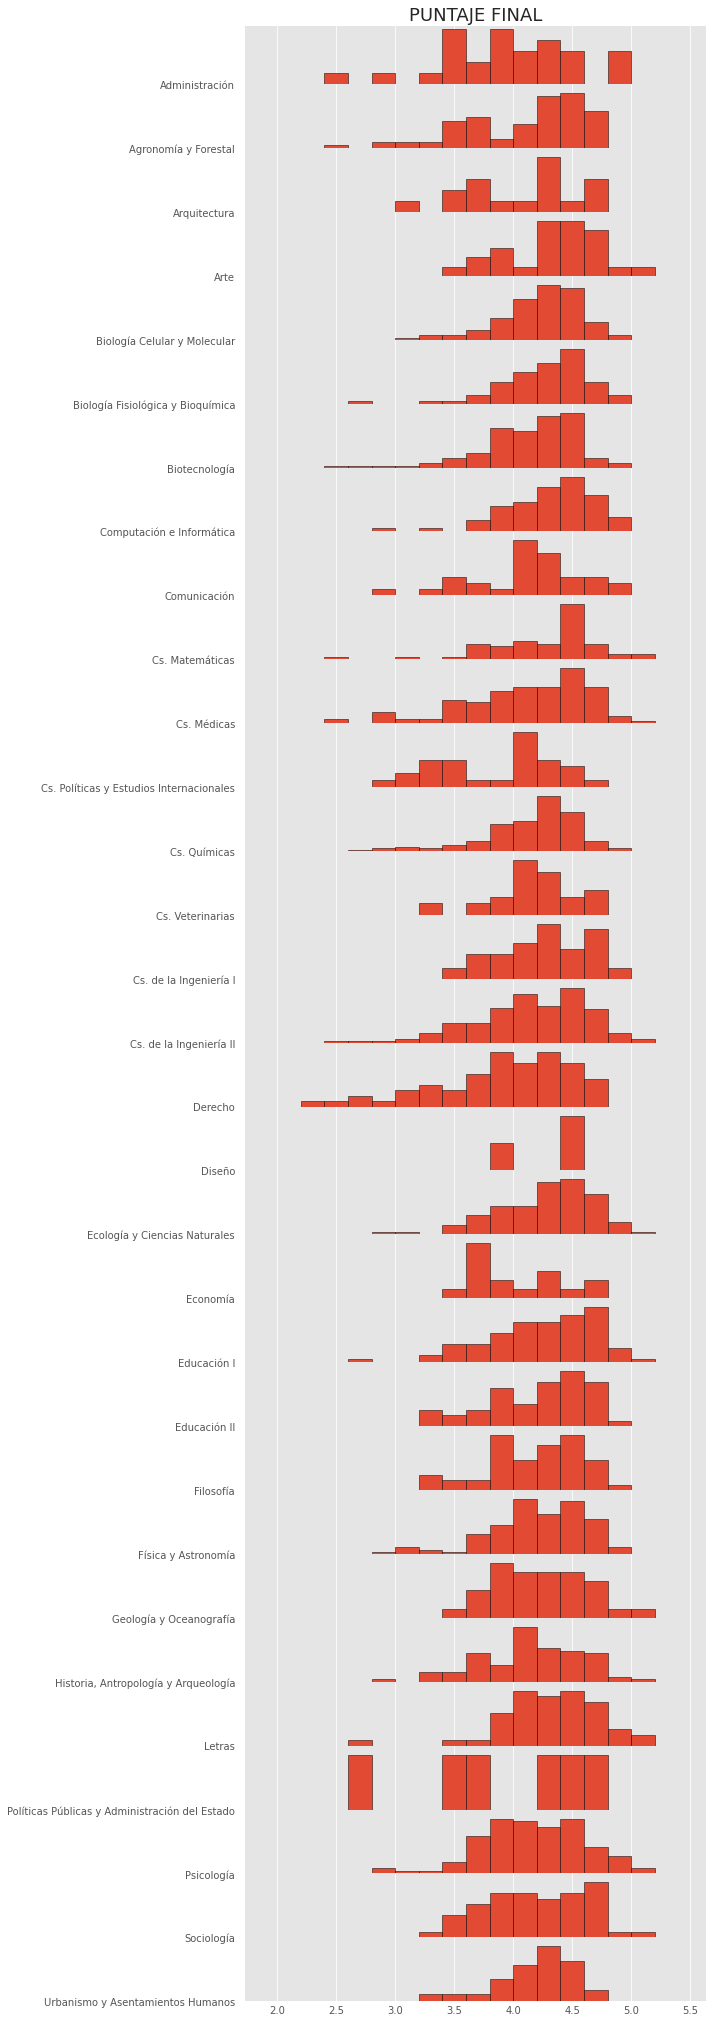

In [32]:
# Draw Plot
plt.figure(figsize=(10, 6), dpi=80)
fig, axes = joypy.joyplot(df2,
                          column=['PUNTAJE_FINAL'],
                          by=["COMITÉ"],
                          hist=True,
                          bins=bins,
                          grid=True,
                          overlap=0,
                          ylim='own',
                          #colormap=plt.cm.autumn_r,
                          colormap=plt.cm.summer_r,
                          #colormap=plt.cm.Set1,
                          figsize=(10, 28))

# Decoration
plt.title('PUNTAJE FINAL', fontsize=18)
plt.show()

<Figure size 1200x720 with 0 Axes>

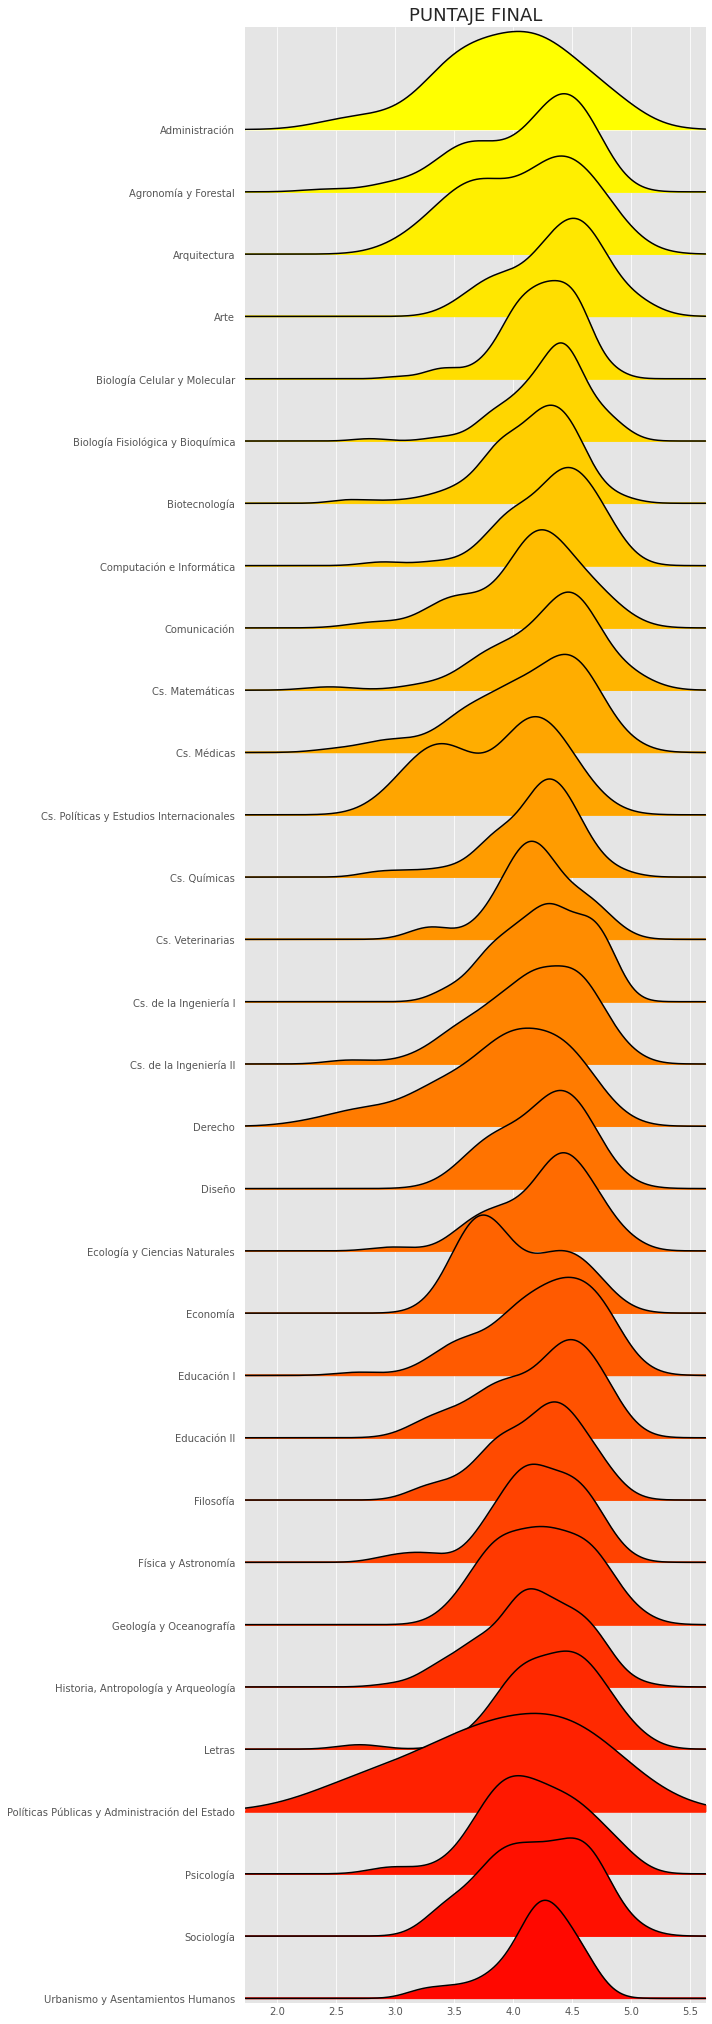

In [33]:
promedio = df2['PUNTAJE_FINAL'].mean()
mediana = df2['PUNTAJE_FINAL'].median()

# Draw Plot
plt.figure(figsize=(10, 6), dpi=120)
fig, axes = joypy.joyplot(df2,
                          column=['PUNTAJE_FINAL'],
                          by=["COMITÉ"],
                          #hist=True,
                          #bins=bins,
                          grid=True,
                          #fill=False,
                          #overlap=0,
                          ylim='own',
                          colormap=plt.cm.autumn_r,
                          #colormap=plt.cm.summer_r,
                          #colormap=plt.cm.Set1,
                          figsize=(10, 28))

# Decoration
plt.title('PUNTAJE FINAL', fontsize=18)

# Mostrar la gráfica
plt.show()

<Figure size 800x480 with 0 Axes>

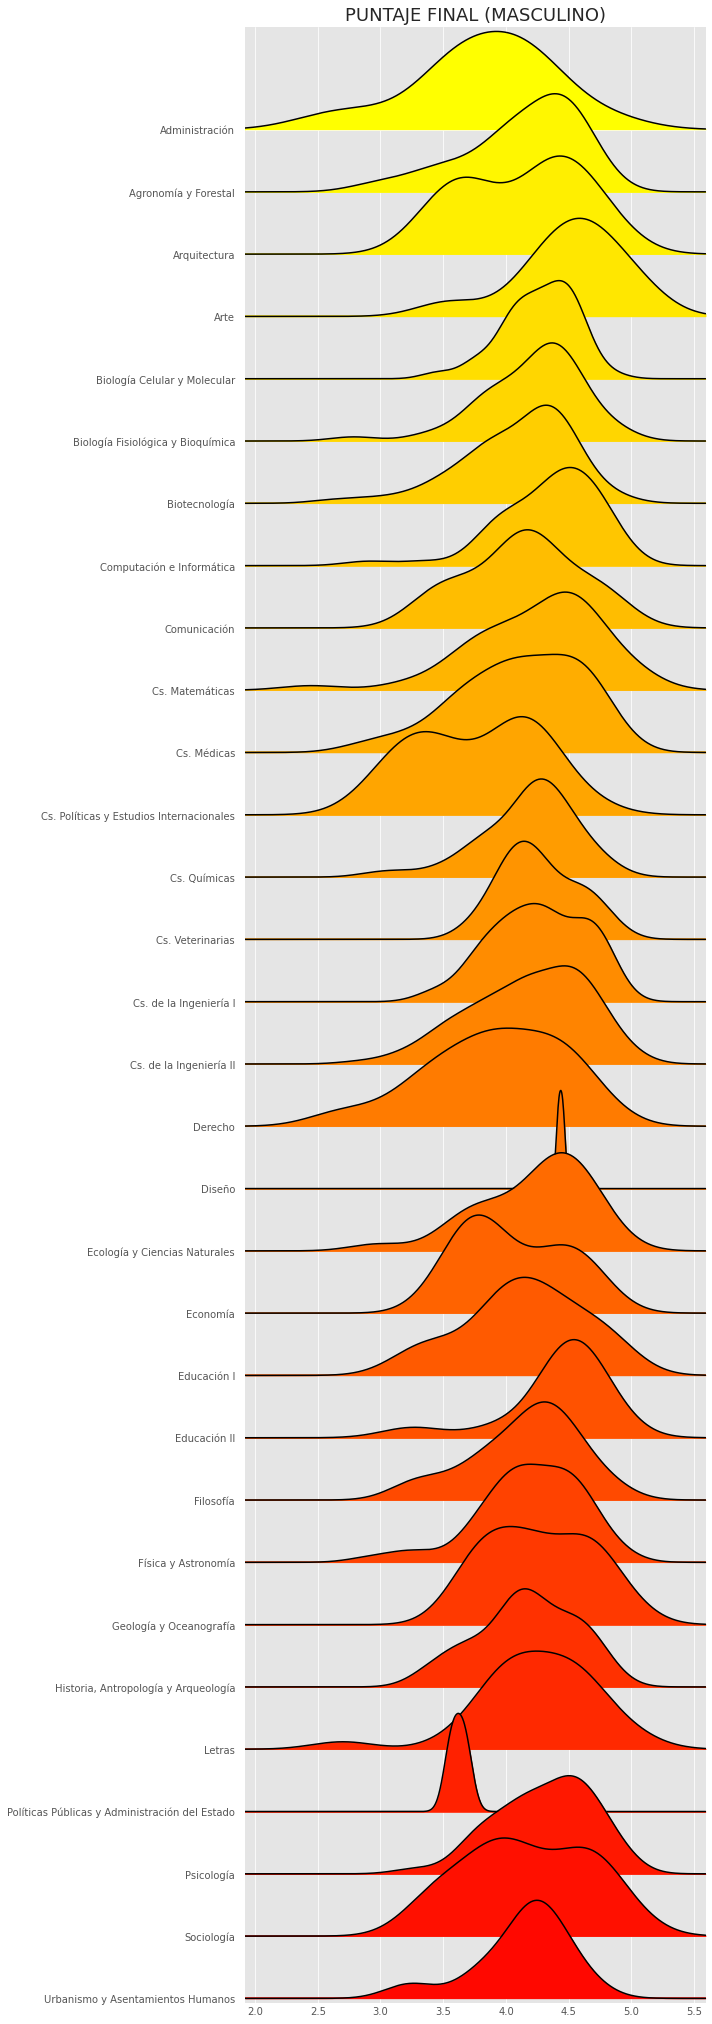

In [34]:
# Draw Plot
plt.figure(figsize=(10, 6), dpi=80)
fig, axes = joypy.joyplot(df2[df2['Género'] == 'Masculino'],
                          column=['PUNTAJE_FINAL'],
                          by=["COMITÉ"],
                          grid=True,
                          ylim='own',
                          colormap=plt.cm.autumn_r,
                          figsize=(10, 28))

# Decoration
plt.title('PUNTAJE FINAL (MASCULINO)', fontsize=18)
plt.show()

<Figure size 800x480 with 0 Axes>

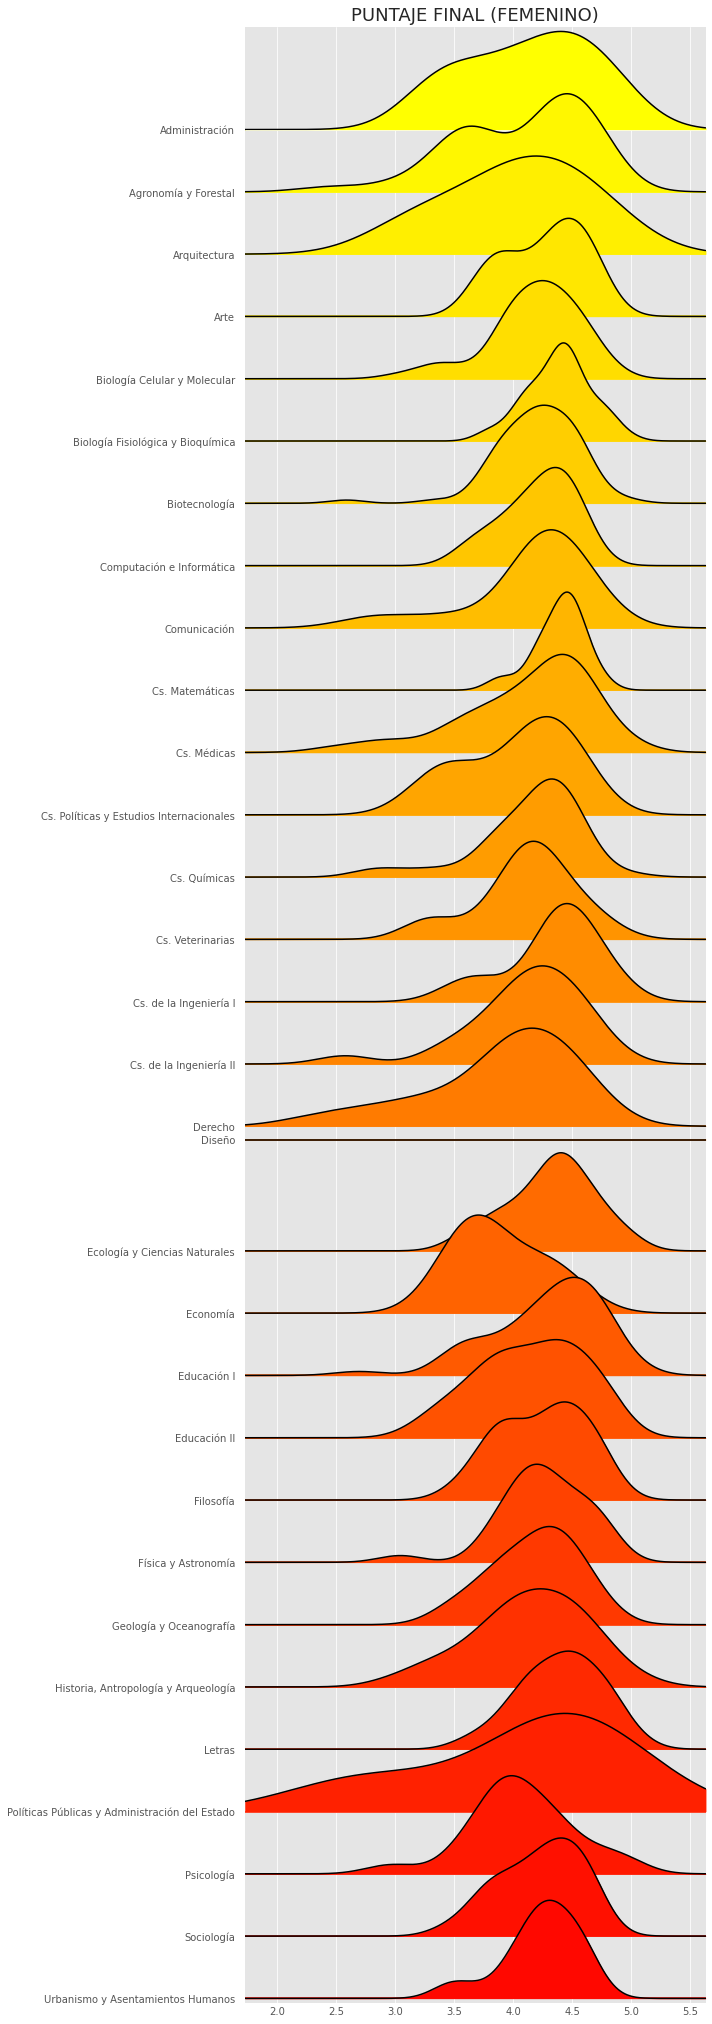

In [35]:
# Draw Plot
plt.figure(figsize=(10, 6), dpi=80)
fig, axes = joypy.joyplot(df2[df2['Género'] == 'Femenino'],
                          column=['PUNTAJE_FINAL'],
                          by=["COMITÉ"],
                          grid=True,
                          ylim='own',
                          colormap=plt.cm.autumn_r,
                          figsize=(10, 28))

# Decoration
plt.title('PUNTAJE FINAL (FEMENINO)', fontsize=18)
plt.show()

# Áreas OCDE


## Admisibles

In [36]:
df2['Área OCDE'].value_counts()

CIENCIAS NATURALES             879
CIENCIAS SOCIALES              511
INGENIERIA Y TECNOLOGIA        256
HUMANIDADES                    241
CIENCIAS MEDICAS Y DE SALUD    142
CIENCIAS AGRICOLAS             114
Name: Área OCDE, dtype: int64

In [37]:
df2.groupby(['Área OCDE','Género'])['FOLIO'].count().unstack(1).stb.subtotal()

Género,Femenino,Masculino
CIENCIAS AGRICOLAS,60,54
CIENCIAS MEDICAS Y DE SALUD,78,64
CIENCIAS NATURALES,339,540
CIENCIAS SOCIALES,273,238
HUMANIDADES,100,141
INGENIERIA Y TECNOLOGIA,58,198
grand_total,908,1235


<AxesSubplot:ylabel='Área OCDE'>

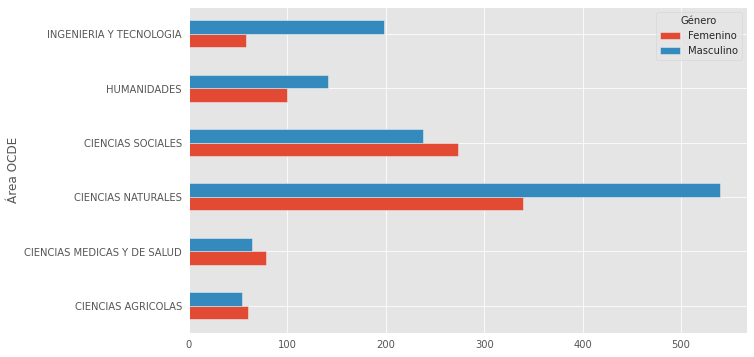

In [38]:
df2.groupby(['Área OCDE','Género'])['FOLIO'].count().unstack(1).plot(kind='barh',figsize=(10,6))

In [39]:
OCDE = df2.groupby(['Área OCDE',])['Género'].value_counts('%').unstack(1)*100
OCDE['Brecha (adm)'] = OCDE['Masculino'] - OCDE['Femenino'] 
OCDE.style.background_gradient(cmap= 'YlOrRd', subset=['Brecha (adm)']).format("{:.2f}%")

Género,Femenino,Masculino,Brecha (adm)
Área OCDE,,,
CIENCIAS AGRICOLAS,52.63%,47.37%,-5.26%
CIENCIAS MEDICAS Y DE SALUD,54.93%,45.07%,-9.86%
CIENCIAS NATURALES,38.57%,61.43%,22.87%
CIENCIAS SOCIALES,53.42%,46.58%,-6.85%
HUMANIDADES,41.49%,58.51%,17.01%
INGENIERIA Y TECNOLOGIA,22.66%,77.34%,54.69%


In [40]:
!pip install pywaffle
from pywaffle import Waffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


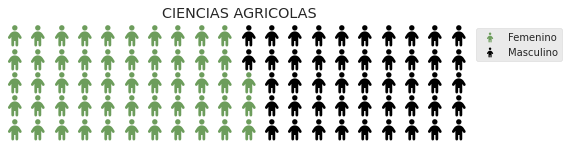

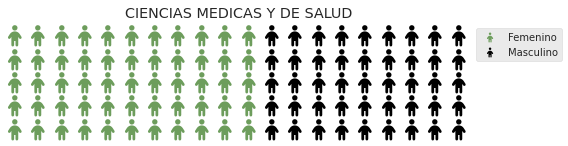

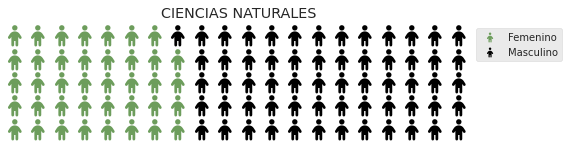

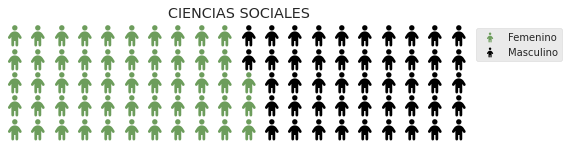

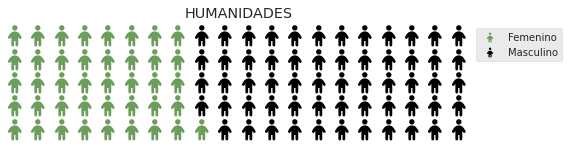

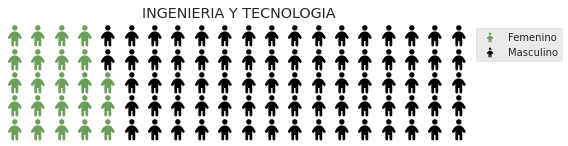

In [41]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values= {'Femenino':53,'Masculino':47}, 
    colors=("#6D9D5C", "#000000"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='child', icon_size=22, 
    icon_legend=True,
    title={'label': 'CIENCIAS AGRICOLAS', 'loc': 'center'},
    figsize=(8, 10),
)

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values= {'Femenino':55,'Masculino':45}, 
    colors=("#6D9D5C", "#000000"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='child', icon_size=22, 
    icon_legend=True,
    title={'label': 'CIENCIAS MEDICAS Y DE SALUD', 'loc': 'center'},
    figsize=(8, 10),
)

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values= {'Femenino':39,'Masculino':61}, 
    colors=("#6D9D5C", "#000000"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='child', icon_size=22, 
    icon_legend=True,
    title={'label': 'CIENCIAS NATURALES', 'loc': 'center'},
    figsize=(8, 10),
)

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values= {'Femenino':53,'Masculino':47}, 
    colors=("#6D9D5C", "#000000"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='child', icon_size=22, 
    icon_legend=True,
    title={'label': 'CIENCIAS SOCIALES', 'loc': 'center'},
    figsize=(8, 10),
)

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values= {'Femenino':41,'Masculino':59}, 
    colors=("#6D9D5C", "#000000"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='child', icon_size=22, 
    icon_legend=True,
    title={'label': 'HUMANIDADES', 'loc': 'center'},
    figsize=(8, 10),
)

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values= {'Femenino':23,'Masculino':77}, 
    colors=("#6D9D5C", "#000000"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='child', icon_size=22, 
    icon_legend=True,
    title={'label': 'INGENIERIA Y TECNOLOGIA', 'loc': 'center'},
    figsize=(8, 10),
)



Las brechas están presentes en las Humanidades (17.0%) Ciencias Naturales (22.6%) e Ingeniería y Tecnología (54.6%). Ahora veamos cómo cambia al revisar solo las postulaciones seleccionadas.

## Seleccionadas

In [42]:
df2[df2['ESTADO_FINAL'] == 'SELECCIONADA'].groupby(['Área OCDE','Género'])['FOLIO'].count().unstack(1).stb.subtotal()

Género,Femenino,Masculino
CIENCIAS AGRICOLAS,26,19
CIENCIAS MEDICAS Y DE SALUD,41,22
CIENCIAS NATURALES,181,206
CIENCIAS SOCIALES,122,75
HUMANIDADES,51,53
INGENIERIA Y TECNOLOGIA,29,75
grand_total,450,450


<AxesSubplot:ylabel='Área OCDE'>

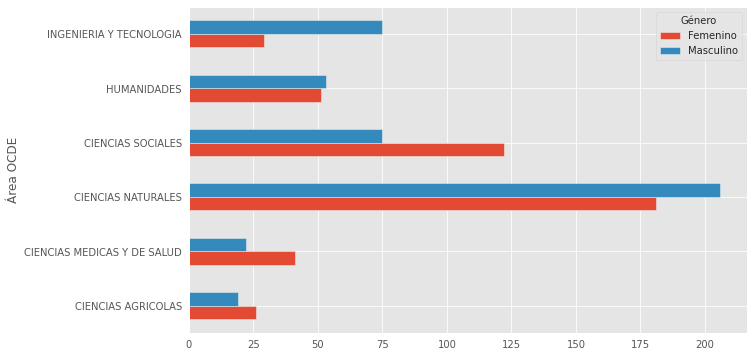

In [43]:
df2[df2['ESTADO_FINAL'] == 'SELECCIONADA'].groupby(['Área OCDE','Género'])['FOLIO'].count().unstack(1).plot(kind='barh',figsize=(10,6))

In [44]:
OCDE_SEL = df2[df2['ESTADO_FINAL'] == 'SELECCIONADA'].groupby(['Área OCDE',])['Género'].value_counts('%').unstack(1)*100
OCDE_SEL['Brecha (sel)'] = OCDE_SEL['Masculino'] - OCDE_SEL['Femenino'] 
OCDE_SEL.style.background_gradient(cmap= 'YlOrRd', subset=['Brecha (sel)']).format("{:.2f}%")

Género,Femenino,Masculino,Brecha (sel)
Área OCDE,,,
CIENCIAS AGRICOLAS,57.78%,42.22%,-15.56%
CIENCIAS MEDICAS Y DE SALUD,65.08%,34.92%,-30.16%
CIENCIAS NATURALES,46.77%,53.23%,6.46%
CIENCIAS SOCIALES,61.93%,38.07%,-23.86%
HUMANIDADES,49.04%,50.96%,1.92%
INGENIERIA Y TECNOLOGIA,27.88%,72.12%,44.23%


Se presentan brechas favorables para el género femenino en las Ciencias Agrícolas (15.5%), Ciencias Sociales (23.8%) y Ciencias Médicas y de la Salud (30.1%).

Las brechas se mitigan tanto para las Humanidades (1.9%), las Ciencias Naturales (6.4%) y en menor medida para la Ingeniería y Tecnología (44.2%). El resultado termina siendo favorable para disminuir la brecha de género por Área OCDE al comparar las diferencias entre admisibles y seleccionados.


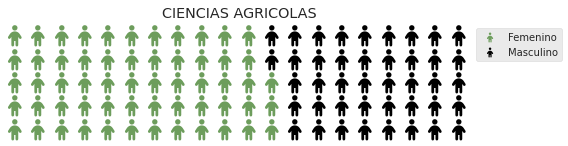

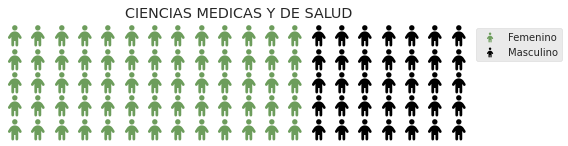

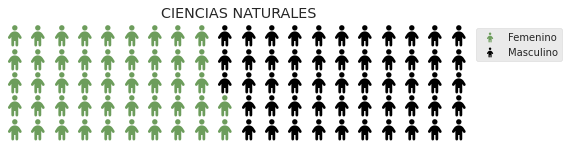

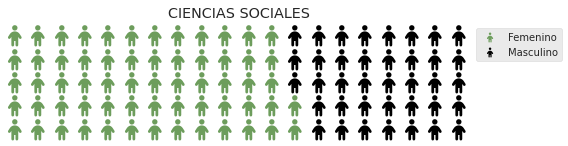

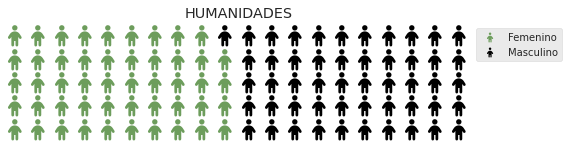

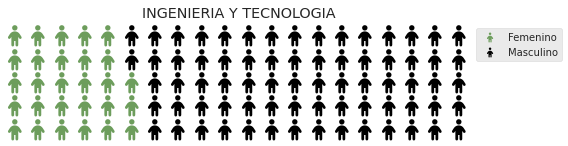

In [45]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values= {'Femenino':58,'Masculino':42}, 
    colors=("#6D9D5C", "#000000"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='child', icon_size=22, 
    icon_legend=True,
    title={'label': 'CIENCIAS AGRICOLAS', 'loc': 'center'},
    figsize=(8, 10),
)

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values= {'Femenino':65,'Masculino':35}, 
    colors=("#6D9D5C", "#000000"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='child', icon_size=22, 
    icon_legend=True,
    title={'label': 'CIENCIAS MEDICAS Y DE SALUD', 'loc': 'center'},
    figsize=(8, 10),
)

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values= {'Femenino':47,'Masculino':53}, 
    colors=("#6D9D5C", "#000000"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='child', icon_size=22, 
    icon_legend=True,
    title={'label': 'CIENCIAS NATURALES', 'loc': 'center'},
    figsize=(8, 10),
)

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values= {'Femenino':62,'Masculino':38}, 
    colors=("#6D9D5C", "#000000"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='child', icon_size=22, 
    icon_legend=True,
    title={'label': 'CIENCIAS SOCIALES', 'loc': 'center'},
    figsize=(8, 10),
)

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values= {'Femenino':49,'Masculino':51}, 
    colors=("#6D9D5C", "#000000"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='child', icon_size=22, 
    icon_legend=True,
    title={'label': 'HUMANIDADES', 'loc': 'center'},
    figsize=(8, 10),
)

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values= {'Femenino':28,'Masculino':72}, 
    colors=("#6D9D5C", "#000000"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='child', icon_size=22, 
    icon_legend=True,
    title={'label': 'INGENIERIA Y TECNOLOGIA', 'loc': 'center'},
    figsize=(8, 10),
)

## Comparación Brecha (Admisibles - Seleccionados)

Género,Brecha (sel),Brecha (adm)
Área OCDE,,
CIENCIAS AGRICOLAS,-15.556,-5.263
CIENCIAS MEDICAS Y DE SALUD,-30.159,-9.859
CIENCIAS NATURALES,6.460,22.867
CIENCIAS SOCIALES,-23.858,-6.849
HUMANIDADES,1.923,17.012
INGENIERIA Y TECNOLOGIA,44.231,54.688


<AxesSubplot:ylabel='Área OCDE'>

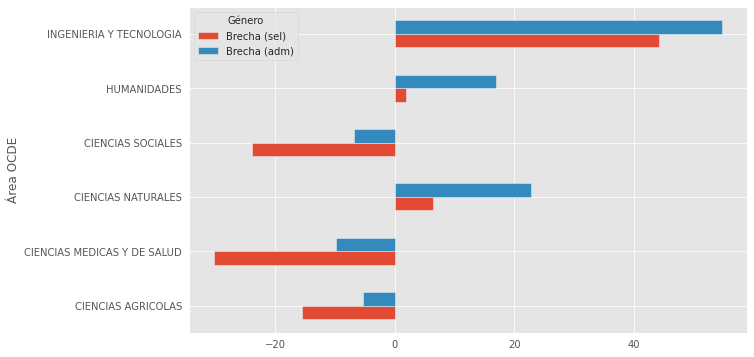

In [46]:
merged = OCDE.merge(OCDE_SEL, on='Área OCDE')
display(merged[['Brecha (sel)','Brecha (adm)']])
merged[['Brecha (sel)','Brecha (adm)']].plot(kind='barh',figsize=(10,6))

Aumenta considerablemente la participación femenina por Área OCDE.

## Análisis por cuartiles (OCDE) 

## Puntaje Final (cuartiles por Área OCDE)

In [47]:
df2.groupby(['Área OCDE'])['PUNTAJE_FINAL'].describe()

,count,mean,std,min,25%,50%,75%,max
Área OCDE,,,,,,,,
CIENCIAS AGRICOLAS,114.0,4.118,0.470,2.424,3.787,4.220,4.479,4.792
CIENCIAS MEDICAS Y DE SALUD,142.0,4.120,0.515,2.454,3.824,4.207,4.507,5.000
CIENCIAS NATURALES,879.0,4.221,0.394,2.445,4.003,4.280,4.490,5.063
CIENCIAS SOCIALES,511.0,4.112,0.477,2.285,3.854,4.180,4.466,5.044
HUMANIDADES,241.0,4.214,0.418,2.699,3.946,4.246,4.524,5.073
INGENIERIA Y TECNOLOGIA,256.0,4.195,0.438,2.532,3.923,4.245,4.538,5.038


In [48]:
df2.groupby(['Área OCDE','Género'])['PUNTAJE_FINAL'].describe()

count   mean    std    min    25%  \
Área OCDE                   Género                                         
CIENCIAS AGRICOLAS          Femenino    60.0  4.075  0.514  2.424  3.704   
                            Masculino   54.0  4.165  0.416  2.915  3.999   
CIENCIAS MEDICAS Y DE SALUD Femenino    78.0  4.130  0.540  2.454  3.866   
                            Masculino   64.0  4.108  0.488  2.817  3.789   
CIENCIAS NATURALES          Femenino   339.0  4.240  0.367  2.588  4.050   
                            Masculino  540.0  4.208  0.410  2.445  3.978   
CIENCIAS SOCIALES           Femenino   273.0  4.126  0.474  2.285  3.875   
                            Masculino  238.0  4.097  0.482  2.565  3.802   
HUMANIDADES                 Femenino   100.0  4.232  0.415  2.991  3.946   
                            Masculino  141.0  4.201  0.420  2.699  3.933   
INGENIERIA Y TECNOLOGIA     Femenino    58.0  4.152  0.474  2.532  3.925   
                            Masculino  198.0  4.208  0.427  2.835  3.924   

                                         50%    75%    max  
Área OCDE                   Género                          
CIENCIAS AGRICOLAS          Femenino   4.220  4.481  4.770  
                            Masculino  4.235  4.479  4.792  
CIENCIAS MEDICAS Y DE SALUD Femenino   4.308  4.507  5.000  
                            Masculino  4.140  4.512  4.903  
CIENCIAS NATURALES          Femenino   4.293  4.486  5.005  
                            Masculino  4.274  4.494  5.063  
CIENCIAS SOCIALES           Femenino   4.191  4.472  5.044  
                            Masculino  4.165  4.455  5.013  
HUMANIDADES                 Femenino   4.293  4.529  5.073  
                            Masculino  4.244  4.513  5.067  
INGENIERIA Y TECNOLOGIA     Femenino   4.258  4.463  4.903  
                            Masculino  4.241  4.551  5.038

## Puntaje por Subcriterios (cuartiles por Área OCDE)

In [49]:
df2.groupby('Área OCDE')["AAP","SUBCRITERIO 2.1", "SUBCRITERIO 2.2","SUBCRITERIO 3.1", "SUBCRITERIO 3.2", "SUBCRITERIO 3.3"].describe().T

<ipython-input-49-49be48e57a0e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2.groupby('Área OCDE')["AAP","SUBCRITERIO 2.1", "SUBCRITERIO 2.2","SUBCRITERIO 3.1", "SUBCRITERIO 3.2", "SUBCRITERIO 3.3"].describe().T


Área OCDE              CIENCIAS AGRICOLAS  CIENCIAS MEDICAS Y DE SALUD  \
AAP             count             114.000                      142.000   
                mean                3.745                        3.879   
                std                 0.548                        0.640   
                min                 2.535                        2.038   
                25%                 3.269                        3.490   
                50%                 3.724                        3.966   
                75%                 4.174                        4.402   
                max                 5.000                        5.000   
SUBCRITERIO 2.1 count             114.000                      142.000   
                mean                4.086                        4.040   
                std                 0.734                        0.776   
                min                 1.000                        1.000   
                25%                 3.562                        3.500   
                50%                 4.250                        4.250   
                75%                 4.688                        4.750   
                max                 5.000                        5.000   
SUBCRITERIO 2.2 count             114.000                      142.000   
                mean                4.340                        4.354   
                std                 0.694                        0.677   
                min                 1.000                        2.000   
                25%                 4.000                        4.000   
                50%                 4.500                        4.500   
                75%                 4.750                        5.000   
                max                 5.000                        5.000   
SUBCRITERIO 3.1 count             114.000                      142.000   
                mean                4.075                        4.021   
                std                 0.687                        0.841   
                min                 2.500                        1.000   
                25%                 3.562                        3.500   
                50%                 4.250                        4.250   
                75%                 4.500                        4.750   
                max                 5.000                        5.000   
SUBCRITERIO 3.2 count             114.000                      142.000   
                mean                4.232                        4.151   
                std                 0.684                        0.863   
                min                 2.000                        1.000   
                25%                 3.812                        3.750   
                50%                 4.500                        4.250   
                75%                 4.750                        4.750   
                max                 5.000                        5.000   
SUBCRITERIO 3.3 count             114.000                      142.000   
                mean                4.129                        4.111   
                std                 0.753                        0.789   
                min                 1.500                        1.000   
                25%                 3.750                        3.750   
                50%                 4.500                        4.250   
                75%                 4.750                        4.750   
                max                 5.000                        5.000   

Área OCDE              CIENCIAS NATURALES  CIENCIAS SOCIALES  HUMANIDADES  \
AAP             count             879.000            511.000      241.000   
                mean                3.846              3.885        4.005   
                std                 0.590              0.687        0.629   
                min                 1.662              1.663     

In [50]:
df2.groupby(['Área OCDE','Género'])["AAP","SUBCRITERIO 2.1", "SUBCRITERIO 2.2","SUBCRITERIO 3.1", "SUBCRITERIO 3.2", "SUBCRITERIO 3.3"].describe().T

<ipython-input-50-0870614cc7ae>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2.groupby(['Área OCDE','Género'])["AAP","SUBCRITERIO 2.1", "SUBCRITERIO 2.2","SUBCRITERIO 3.1", "SUBCRITERIO 3.2", "SUBCRITERIO 3.3"].describe().T


Área OCDE             CIENCIAS AGRICOLAS            \
Género                          Femenino Masculino   
AAP             count             60.000    54.000   
                mean               3.760     3.729   
                std                0.535     0.567   
                min                2.535     2.774   
                25%                3.337     3.257   
                50%                3.748     3.662   
                75%                4.078     4.224   
                max                5.000     4.888   
SUBCRITERIO 2.1 count             60.000    54.000   
                mean               4.029     4.148   
                std                0.801     0.652   
                min                1.000     2.500   
                25%                3.500     3.750   
                50%                4.250     4.250   
                75%                4.500     4.750   
                max                5.000     5.000   
SUBCRITERIO 2.2 count             60.000    54.000   
                mean               4.292     4.394   
                std                0.780     0.586   
                min                1.000     2.250   
                25%                4.000     4.000   
                50%                4.500     4.500   
                75%                4.750     4.750   
                max                5.000     5.000   
SUBCRITERIO 3.1 count             60.000    54.000   
                mean               4.000     4.157   
                std                0.713     0.654   
                min                2.500     2.500   
                25%                3.500     4.000   
                50%                4.250     4.250   
                75%                4.500     4.500   
                max                5.000     5.000   
SUBCRITERIO 3.2 count             60.000    54.000   
                mean               4.125     4.352   
                std                0.736     0.606   
                min                2.000     2.000   
                25%                3.750     4.250   
                50%                4.250     4.500   
                75%                4.750     4.750   
                max                5.000     5.000   
SUBCRITERIO 3.3 count             60.000    54.000   
                mean               4.079     4.185   
                std                0.810     0.689   
                min                1.500     2.500   
                25%                3.500     3.750   
                50%                4.250     4.500   
                75%                4.750     4.750   
                max                5.000     5.000   

Área OCDE             CIENCIAS MEDICAS Y DE SALUD            \
Género                                   Femenino Masculino   
AAP             count                      78.000    64.000   
                mean                        3.870     3.890   
                std                         0.616     0.674   
                min                         2.127     2.038   
                25%                         3.478     3.522   
                50%                         4.006     3.966   
                75%                         4.372     4.465   
                max                         4.776     5.000   
SUBCRITERIO 2.1 count                      78.000    64.000   
                mean                        4.067     4.008   
                std                         0.833     0.704   
                min                         1.000     2.500   
                25%                         3.750     3.500   
                50%                         4.250     4.000   
                75%                         4.750     4.500   
                max                         5.000     5.000   
SUBCRITERIO 2.2 count                      78.000    64.000   
                mean                        4.321     4.395   
                std                    